# Tarea de Scraping Web con Python y Selenium

## Objetivo
Desarrollar habilidades prácticas en scraping web utilizando Python con Selenium y BeautifulSoup. Se espera que manejen el navegador de forma programática para extraer datos dinámicos de un sitio web específico y que realicen un análisis básico de los datos obtenidos.

## Instrucciones
1. Configura tu entorno de desarrollo instalando las librerías necesarias: Selenium, BeautifulSoup, pandas, entre otras que consideres necesarias.
2. Configura un navegador usando Selenium. Debes asegurarte de incluir opciones como el modo incógnito y el modo sin interfaz gráfica (headless).
3. Elige un sitio web que ofrezca datos dinámicos y sea legal para hacer scraping (por ejemplo, datos meteorológicos, precios de productos, cotizaciones de bolsa).
4. Navega al sitio web utilizando Selenium, realiza búsquedas o filtra datos si es necesario utilizando interacciones del navegador.
5. Extrae datos relevantes usando Selenium y BeautifulSoup. Debes obtener al menos tres tipos de datos relacionados (por ejemplo, nombre del producto, precio y categoría).
6. Limpia y organiza los datos extraídos en un DataFrame de pandas.
7. Realiza un análisis básico de los datos: puede ser estadístico descriptivo o alguna visualización simple.
8. Documenta cada paso del proceso con comentarios en el código y celdas Markdown explicando las decisiones y métodos utilizados.

## Criterios de Evaluación
- Correcta configuración y uso de Selenium y BeautifulSoup.
- Capacidad para navegar y extraer datos de forma efectiva y eficiente.
- Limpieza y estructuración adecuada de los datos extraídos.
- Calidad del análisis realizado y claridad en la documentación.

## Entrega
- Debes entregar este cuaderno Jupyter completado con todo el código, análisis y documentación solicitada.

¡Buena suerte y que disfrutes del proceso de aprendizaje y exploración de datos!


In [70]:
pip install undetected-chromedriver

Note: you may need to restart the kernel to use updated packages.


1. Configura tu entorno de desarrollo instalando las librerías necesarias: Selenium, BeautifulSoup, pandas, entre otras que consideres necesarias.

In [71]:
# Importar el módulo time para manejar tiempos
import time

# Importar undetected_chromedriver como uc para evitar ser detectado
import undetected_chromedriver as uc

# Importar diferentes clases y métodos de Selenium para la automatización del navegador
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains

# Importar BeautifulSoup (bs) para el análisis del código HTML
from bs4 import BeautifulSoup as bs

# Importar el módulo requests para realizar solicitudes HTTP
import requests
import pandas as pd
import matplotlib.pyplot as plt

2. Configura un navegador usando Selenium. Debes asegurarte de incluir opciones como el modo incógnito y el modo sin interfaz gráfica (headless).

In [72]:
# Crear un objeto ChromeOptions para configurar las opciones del navegador
options = uc.ChromeOptions()

# Configurar el modo headless del navegador (sin interfaz gráfica)
options.headless = True

# Agregar argumentos para abrir una ventana de incógnito
options.add_argument("--incognito")

# Agregar argumentos para deshabilitar las barras de información del navegador y no interfaz grafica
options.add_argument("--disable-infobars")
options.add_argument("--headless") 

# Crear una instancia del navegador Chrome con las opciones configuradas
driver = uc.Chrome(options=options)


#options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.79 Safari/537.3")
#driver = webdriver.Chrome(options=options)

3. Elige un sitio web que ofrezca datos dinámicos y sea legal para hacer scraping (por ejemplo, datos meteorológicos, precios de productos, cotizaciones de bolsa).

NOTA: ELEGÍ EL YOUTUBE DE TAYLOR SWIFT COMO ES HEADLESS NO SE MUESTRA PERO SÍ SUENA LOL NO SE VAYAN A ASUSTAR

In [73]:
#Sitie web a visitar
driver.get("https://www.youtube.com/@TaylorSwift")

4. Navega al sitio web utilizando Selenium, realiza búsquedas o filtra datos si es necesario utilizando interacciones del navegador.

In [74]:
#Tomamos ss de la pagina
print("Capturando pantalla...")
driver.save_screenshot("screenshot.png")

Capturando pantalla...


True

In [75]:
driver.implicitly_wait(5)
# Obtenemos el url de la pagina en la que estamos 
current_url = driver.current_url
print("URL actual:", current_url)
# Encontrar el elemento en el que deseas hacer clic
elemento = driver.find_element(By.XPATH, '//*[@id="tabsContent"]/yt-tab-group-shape/div[1]/yt-tab-shape[6]/div[1]')

# Hacer clic en el elemento
elemento.click()

# Cambiar al contexto de la nueva ventana o pestaña
driver.switch_to.window(driver.window_handles[-1])
driver.implicitly_wait(20)

# Ahora puedes interactuar con los elementos dentro de la nueva ventana o pestaña
# Por ejemplo, puedes obtener la URL de la nueva ventana o pestaña
print("URL de la nueva ventana o pestaña:", driver.current_url)


URL actual: https://www.youtube.com/@TaylorSwift
URL de la nueva ventana o pestaña: https://www.youtube.com/@TaylorSwift/playlists


In [76]:
# Retroceder en el historial de navegación
driver.back()
driver.implicitly_wait(20)

In [77]:
#  Refrescar la página
driver.refresh()
driver.implicitly_wait(20)

5. Extrae datos relevantes usando Selenium y BeautifulSoup. Debes obtener al menos tres tipos de datos relacionados (por ejemplo, nombre del producto, precio y categoría).

In [78]:
# Vamos a hacer un data frame de los videos de la pagina
videos = driver.find_elements(By.CLASS_NAME, "style-scope ytd-grid-video-renderer")
#lista vacía para guardar los datos
video_list = []
#Por cada video guardamos su título, vistas y fecha de publicación
for video in videos:
    title = video.find_element(By.XPATH, ".//*[@id='video-title']").text
    views = video.find_element(By.XPATH,".//*[@id='metadata-line']/span[1]").text
    when = video.find_element(By.XPATH,".//*[@id='metadata-line']/span[2]").text
    vid_item = { 
        "title": title,
        "views": views,
        "when": when
    }
    video_list.append(vid_item)

#Creamos un data frame con los datos
df = pd.DataFrame(video_list)
print(df)

                                                title       views         when
0   Taylor Swift - Fortnight (feat. Post Malone) (...   63M views  4 weeks ago
1   Taylor Swift - The Tortured Poets Department (...  7.7M views  4 weeks ago
2   Taylor Swift - My Boy Only Breaks His Favorite...  7.1M views  4 weeks ago
3      Taylor Swift - Down Bad (Official Lyric Video)  9.6M views  4 weeks ago
4   Taylor Swift - So Long, London (Official Lyric...  7.7M views  4 weeks ago
..                                                ...         ...          ...
60  Taylor Swift - The Black Dog (Official Lyric V...  3.4M views  4 weeks ago
61  Taylor Swift - The Alchemy (Official Lyric Video)  4.2M views  4 weeks ago
62  Taylor Swift - Who’s Afraid of Little Old Me? ...  8.6M views  4 weeks ago
63  Taylor Swift - Florida!!! (feat. Florence + Th...  5.6M views  4 weeks ago
64  Taylor Swift - Fortnight (feat. Post Malone) (...   63M views  4 weeks ago

[65 rows x 3 columns]


6. Limpia y organiza los datos extraídos en un DataFrame de pandas.

In [79]:
# Limpiar los datos: eliminar filas vacías y eliminar 'M views' de la columna 'views'
df = df.dropna()
df['views'] = df['views'].str.replace('M views', '')

# Convertir la columna 'views' a formato numérico, ignorando las cadenas vacías
df['views'] = pd.to_numeric(df['views'], errors='coerce')

# Eliminar filas con valores nulos en la columna 'views'
df = df.dropna(subset=['views'])

7. Realiza un análisis básico de los datos: puede ser estadístico descriptivo o alguna visualización simple.

Estadísticas descriptivas de las vistas:
count     62.000000
mean      50.740323
std       81.927244
min        3.000000
25%        8.450000
50%       15.500000
75%       57.500000
max      429.000000
Name: views, dtype: float64


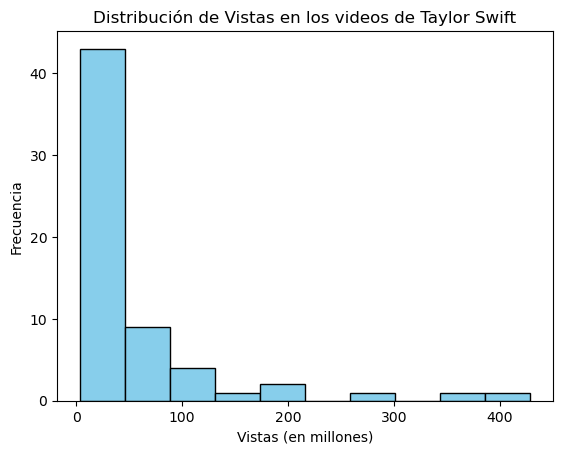

In [80]:
# Realizar un análisis básico de los datos
print("Estadísticas descriptivas de las vistas:")
print(df['views'].describe())

# Visualización simple: histograma de vistas
plt.hist(df['views'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Vistas en los videos de Taylor Swift')
plt.xlabel('Vistas (en millones)')
plt.ylabel('Frecuencia')
plt.show()

Distribución de 'when':  when
3 years ago      19
4 weeks ago      13
6 months ago      6
10 months ago     6
1 year ago        6
2 years ago       6
4 years ago       4
3 weeks ago       1
5 years ago       1
Name: count, dtype: int64


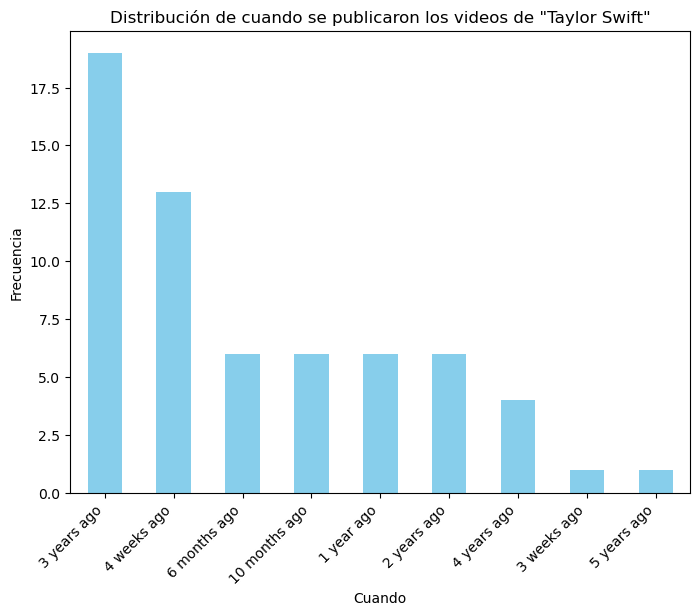

In [81]:
# Realizar un análisis básico de la columna 'when'
when_counts = df['when'].value_counts()
print("Distribución de 'when': ", when_counts)

# Visualización simple: gráfico de barras de la distribución de 'when'
plt.figure(figsize=(8, 6))
when_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de cuando se publicaron los videos de "Taylor Swift"')
plt.xlabel('Cuando')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

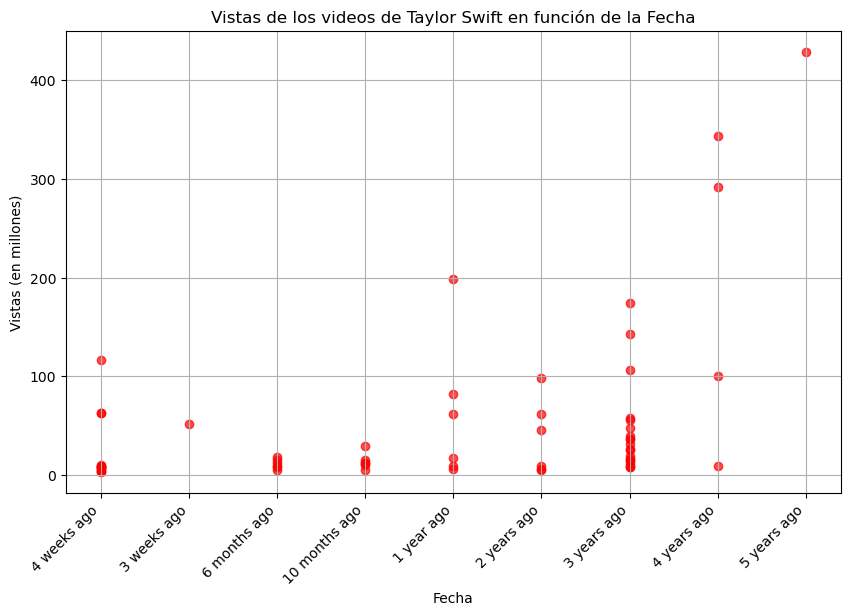

In [82]:

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['when'], df['views'], color='red', alpha=0.7)
plt.title('Vistas de los videos de Taylor Swift en función de la Fecha')
plt.xlabel('Fecha')
plt.ylabel('Vistas (en millones)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()